In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chinese-mnist/chinese_mnist.csv
/kaggle/input/chinese-mnist/chinese_mnist.tfrecords
/kaggle/input/chinese-mnist/data/data/input_3_9_14.jpg
/kaggle/input/chinese-mnist/data/data/input_29_9_14.jpg
/kaggle/input/chinese-mnist/data/data/input_86_3_5.jpg
/kaggle/input/chinese-mnist/data/data/input_67_10_4.jpg
/kaggle/input/chinese-mnist/data/data/input_35_4_4.jpg
/kaggle/input/chinese-mnist/data/data/input_58_7_5.jpg
/kaggle/input/chinese-mnist/data/data/input_49_4_9.jpg
/kaggle/input/chinese-mnist/data/data/input_1_1_12.jpg
/kaggle/input/chinese-mnist/data/data/input_86_1_9.jpg
/kaggle/input/chinese-mnist/data/data/input_71_3_8.jpg
/kaggle/input/chinese-mnist/data/data/input_32_2_3.jpg
/kaggle/input/chinese-mnist/data/data/input_71_1_13.jpg
/kaggle/input/chinese-mnist/data/data/input_87_2_12.jpg
/kaggle/input/chinese-mnist/data/data/input_63_1_10.jpg
/kaggle/input/chinese-mnist/data/data/input_71_10_2.jpg
/kaggle/input/chinese-mnist/data/data/input_22_10_4.jpg
/kaggle/input/c

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [4]:
df = pd.read_csv('/kaggle/input/chinese-mnist/chinese_mnist.csv')
df.head()

,suite_id,sample_id,code,value,character
0,1,1,10,9,九
1,1,10,10,9,九
2,1,2,10,9,九
3,1,3,10,9,九
4,1,4,10,9,九


In [5]:
df.columns

Index(['suite_id', 'sample_id', 'code', 'value', 'character'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   suite_id   15000 non-null  int64 
 1   sample_id  15000 non-null  int64 
 2   code       15000 non-null  int64 
 3   value      15000 non-null  int64 
 4   character  15000 non-null  object
dtypes: int64(4), object(1)
memory usage: 586.1+ KB


In [7]:
df.describe()

,suite_id,sample_id,code,value
count,15000.000000,15000.000000,15000.000000,1.500000e+04
mean,50.500000,5.500000,8.000000,6.667410e+06
std,28.867032,2.872377,4.320638,2.494502e+07
min,1.000000,1.000000,1.000000,0.000000e+00
25%,25.750000,3.000000,4.000000,3.000000e+00
50%,50.500000,5.500000,8.000000,7.000000e+00
75%,75.250000,8.000000,12.000000,1.000000e+02
max,100.000000,10.000000,15.000000,1.000000e+08


In [8]:
df['value'].value_counts()

value
9            1000
10           1000
100          1000
1000         1000
10000        1000
100000000    1000
0            1000
1            1000
2            1000
3            1000
4            1000
5            1000
6            1000
7            1000
8            1000
Name: count, dtype: int64

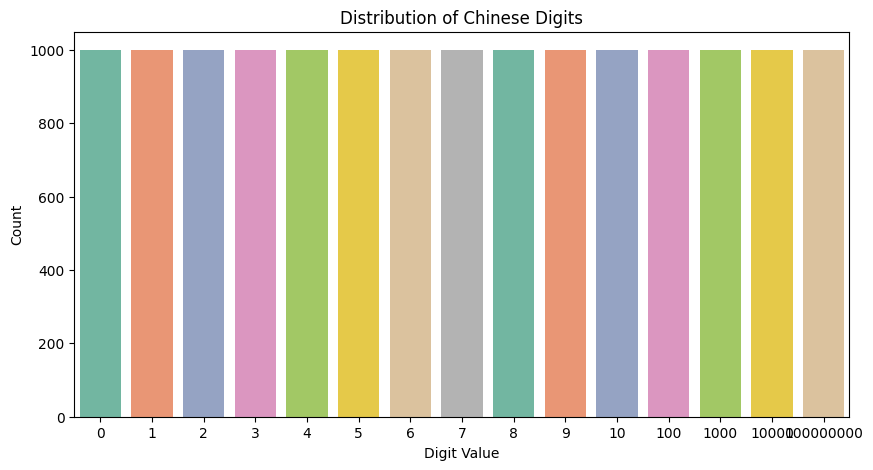

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(x='value', data=df, palette='Set2')
plt.title('Distribution of Chinese Digits')
plt.xlabel('Digit Value')
plt.ylabel('Count')
plt.show()

In [10]:
X = df.drop(['value', 'character'], axis=1)
y = df['value']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9943333333333333

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       186
           1       1.00      1.00      1.00       182
           2       1.00      1.00      1.00       206
           3       1.00      1.00      1.00       198
           4       0.99      1.00      1.00       194
           5       1.00      1.00      1.00       207
           6       1.00      1.00      1.00       203
           7       1.00      1.00      1.00       201
           8       0.99      0.99      0.99       188
           9       0.99      1.00      0.99       201
          10       0.96      0.99      0.98       189
         100       1.00      0.96      0.98       209
        1000       1.00      0.99      0.99       221
       10000       0.99      1.00      1.00       217
   100000000       1.00      1.00      1.00       198

    accuracy                           0.99      3000
   macro avg       0.99   

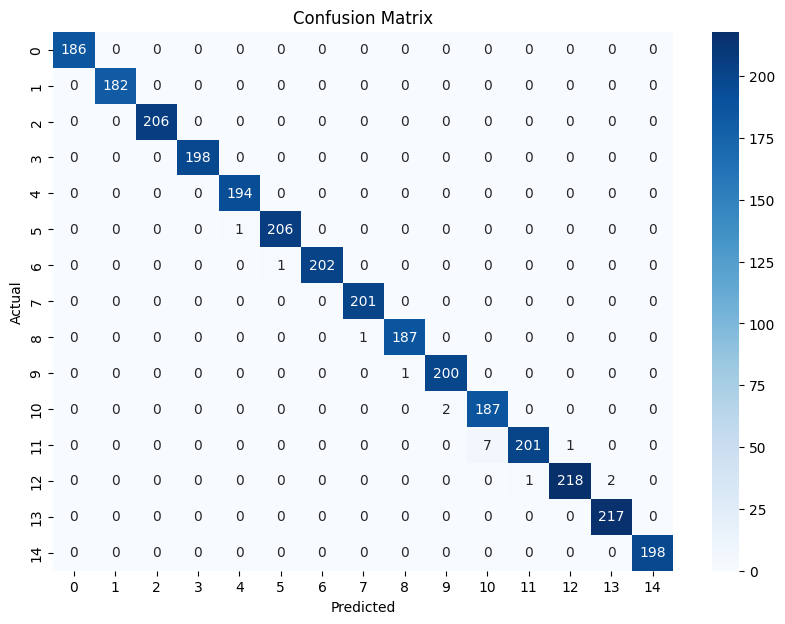

In [14]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()